In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

In [2]:
def subplots(plotPos,title,data,time,color,ylabel,xlabel):

    #plot the inputted data into the subplot specified in the list plotPos
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(time,data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [3]:
def frequencyModulation(carrierFreq,modulatorFreq,modulatorAmp,modIndex,length):
    
    # create a time series from 0 to 1 the inputted length    
    timeSeries = np.linspace(0, 1, length)
    
    #create the modulator signal using a cosine wave modulator with the time series
    #using the inputted modulation frequency and the np.cos function
    #then and multiple it by the inputted modulation amplitude 
    modulator = np.cos(2.0 * np.pi * modulatorFreq * timeSeries)


    # remember in AM modulation the carrier was multiplied by the modulator to change the amplitude over time
    #       product = (1+modIndex*modulator)*carrier    
    # note that this is slightly different for FM modulation
    # the product is created using the carrier frequency to modulate the modulator signal   
    #product = np.cos(2. * np.pi * (carrierFreq * timeSeries + modulator * modIndex))
    product = np.cos(2. * np.pi * (carrierFreq + modulator) * timeSeries * modIndex)
    
    #create a time series to represent time for plotting
    time=np.arange(0,length)/44100

    # create an instance of the carrier signal using the time series and the inputted carrier frequency
    # for plotting purposes
    carrier = np.cos(2.0 * np.pi * carrierFreq * timeSeries)    
    
    subplots([3,1,1],'Frequency Modulation',modulator,time,'g','Amplitude','Modulator signal')
    subplots([3,1,2],'Frequency Modulation',carrier,time,'r','Amplitude','Carrier signal')
    subplots([3,1,3],'Frequency Modulation',product,time,'purple','Amplitude','AM signal')
    
    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    
    return product

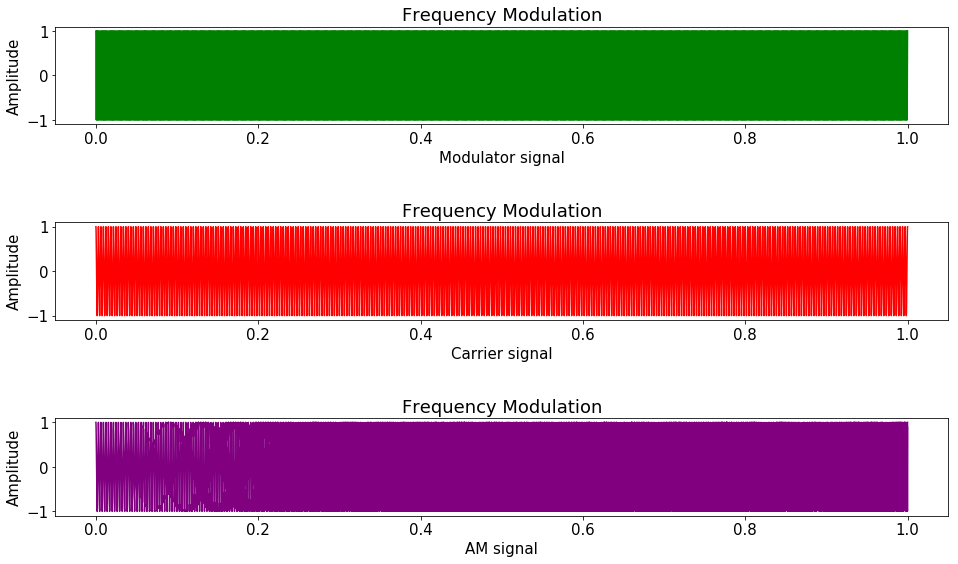

In [15]:
carrierFreq = 325
modulatorFreq = 100
modulatorAmp = 0.5
modIndex = 1
length = 44100

modSignal=frequencyModulation(carrierFreq,modulatorFreq,modulatorAmp,modIndex,length)
IPython.display.Audio(data=modSignal, rate=44100)

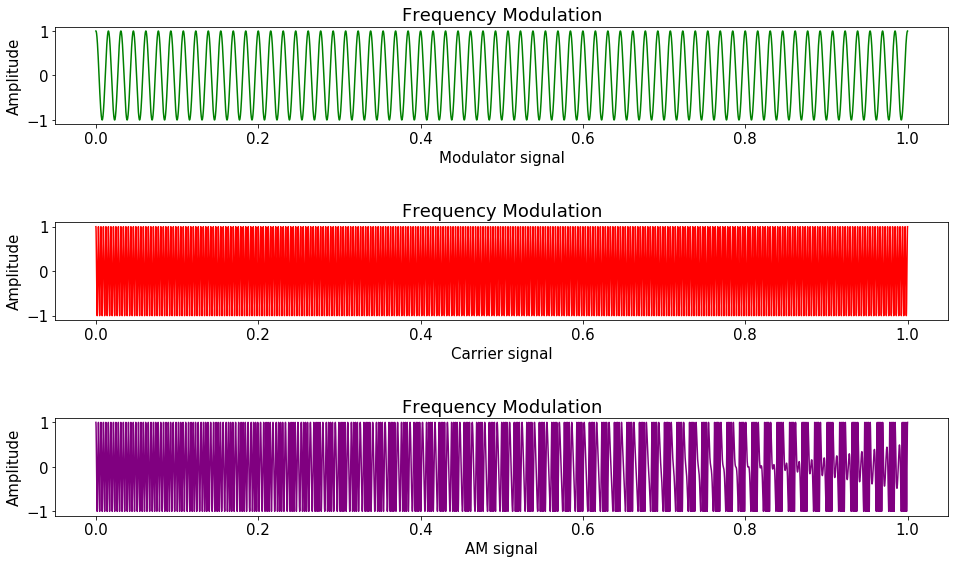

In [30]:
modSignal=frequencyModulation(325,65,0.5,1,44100)
IPython.display.Audio(data=modSignal, rate=44100)

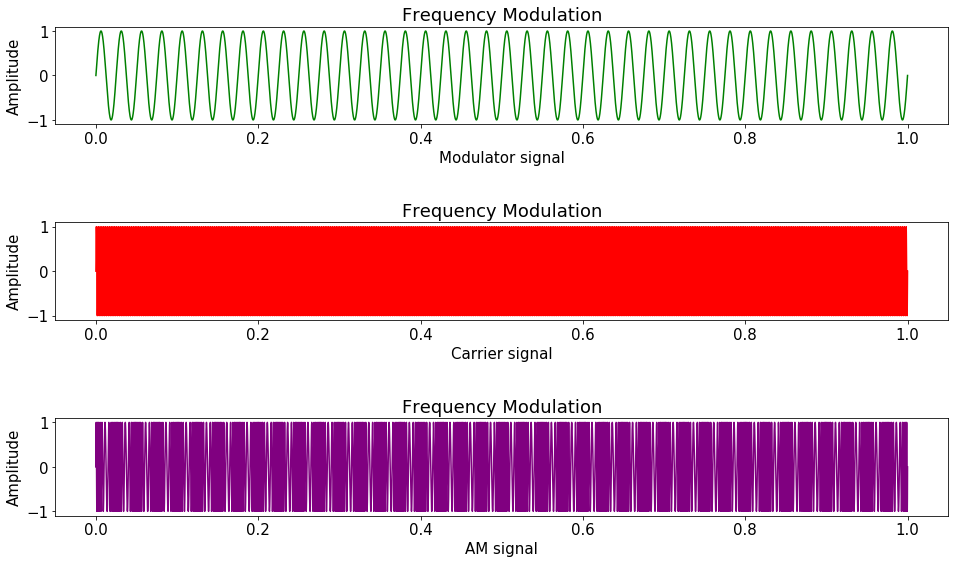

In [9]:
modSignal=frequencyModulation(440,40,0.5,1,44100)
IPython.display.Audio(data=modSignal, rate=44100)